# Implementing Deep Learning to MNIST dataset

Import libraries


In [0]:
from __future__ import print_function
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
np.random.seed(42)

Load dataset

In [0]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

---


## Building Simple Neural Net

In [13]:
# tuning parameter
NUM_EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NUM_CLASSES = 10
OPTIMIZER = keras.optimizers.SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

# reshape the X_train and X_test from (:, 28, 28) to (:, 784)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

# normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Number of training samples: ", X_train.shape[0])
print("Number of test samples: ", X_test.shape[0])

# convert class vectors to binary class matrices
Y_train = keras.utils.np_utils.to_categorical(y_train, NUM_CLASSES)
Y_test = keras.utils.np_utils.to_categorical(y_test, NUM_CLASSES)

print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)
print("Training labels shape: ", Y_train.shape)
print("Test labels shape: ", Y_test.shape)


Number of training samples:  60000
Number of test samples:  10000
Training data shape:  (60000, 784)
Test data shape:  (10000, 784)
Training labels shape:  (60000, 10)
Test labels shape:  (10000, 10)


### First Model

Using only one layer which is the output layer

In [4]:
# constants
NUM_EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
NUM_CLASSES = 10
OPTIMIZER = keras.optimizers.SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

# build the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(NUM_CLASSES, input_shape=(X_train.shape[1],),
                             activation='softmax'))

# compile
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER,
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT, epochs=NUM_EPOCHS)

# evaluation
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Loss score: ", score[0])
print("Accuracy score: ", score[1])
model.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/20





48000/48000 [==============================] - 2s 37us/step - loss: 1.3825 - acc: 0.6687 - val_loss: 0.8941 - val_acc: 0.8307
Epoch 2/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.7918 - acc: 0.8290 - val_loss: 0.6553 - val_acc: 0.8598
Epoch 3/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.6417 - acc: 0.8507 - val_loss: 0.5596 - val_acc: 0.8707
Epoch 4/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.5693 - acc: 0.8619 - val_loss: 0.5070 - val_acc: 0.8786
Epoch 5/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.5254 - acc: 0.8690 - val_loss: 0.4732 - val_acc: 0.8832
Epoch 6/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.4953 - acc: 0.8738 - val_loss: 0.4494 - val_acc: 0.8862
Epoch 7/20
48000/4800

__Visualizing__

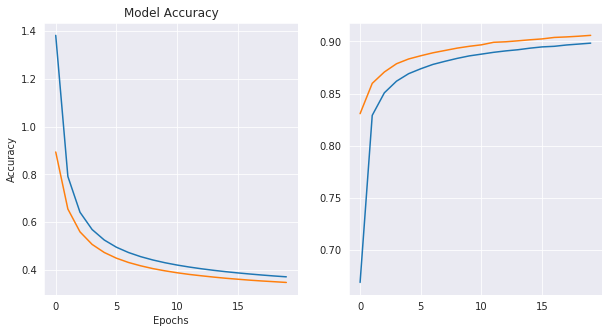

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# loss
axes[0].plot(range(NUM_EPOCHS), history.history['loss'])
axes[0].plot(range(NUM_EPOCHS), history.history['val_loss'])
axes[0].set(title='Model Loss', xlabel='Epochs', ylabel='Loss')

# accuracy
axes[1].plot(range(NUM_EPOCHS), history.history['acc'])
axes[1].plot(range(NUM_EPOCHS), history.history['val_acc'])
axes[0].set(title='Model Accuracy', xlabel='Epochs', ylabel='Accuracy');

### Second Model

Making a deeper neural network

In [6]:
# constants
NUM_EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
NUM_CLASSES = 10
OPTIMIZER = keras.optimizers.SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

# build the model, composed by one input layer, one hidden layer, and 
model = keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(keras.layers.Dense(NUM_CLASSES, activation='softmax'))

# compile
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy',
              metrics=['accuracy'])

# train the model
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, 
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
model.summary()

# evaluation
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

print("Loss score: ", score[0])
print("Accuracy score: ", score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 45us/step - loss: 1.4106 - acc: 0.6541 - val_loss: 0.7031 - val_acc: 0.8467
Epoch 2/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.5694 - acc: 0.8579 - val_loss: 0.4380 - val_acc: 0.8868
Epoch 3/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.4263 - acc: 0.8850 - val_loss: 0.3660 - val_acc: 0.9004
Epoch 4/20
48000/48000 [==============================] - 2s 41us/step - loss: 0.3717 - acc: 0.8975 - val_loss: 0.3300 - val_acc: 0.9064
Epoch 5/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.3400 - acc: 0.9049 - val_loss: 0.3073 - val_acc: 0.9130
Epoch 6/20
48000/48000 [==============================] - 2s 41us/step - loss: 0.3180 - acc: 0.9102 - val_loss: 0.2909 - val_acc: 0.9171
Epoch 7/20
48000/48000 [==============================] - 2s 43us/step - loss: 0.3007 - acc: 0.9149 - val_loss: 0.2774 - val_acc

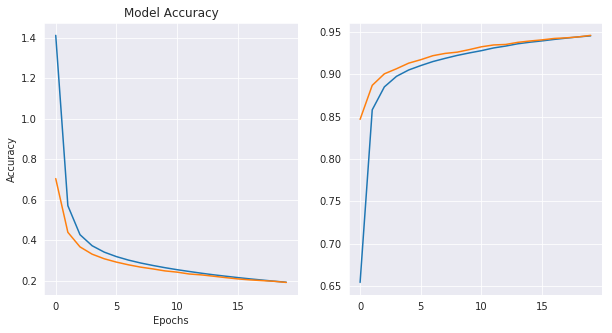

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# loss
axes[0].plot(range(NUM_EPOCHS), history.history['loss'])
axes[0].plot(range(NUM_EPOCHS), history.history['val_loss'])
axes[0].set(title='Model Loss', xlabel='Epochs', ylabel='Loss')

# accuracy
axes[1].plot(range(NUM_EPOCHS), history.history['acc'])
axes[1].plot(range(NUM_EPOCHS), history.history['val_acc'])
axes[0].set(title='Model Accuracy', xlabel='Epochs', ylabel='Accuracy');

### Third Model

Using deeper neural networks with Dropout

In [8]:
# ======== constants =========
NUM_EPOCHS = 25
BATCH_SIZE = 128
VERBOSE = 1
NUM_CLASSES = 10
OPTIMIZER = keras.optimizers.Adam()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.1
DROPOUT_RATE = 0.1

# ======= build the model ==========
model = keras.models.Sequential()
# input layer
model.add(keras.layers.Dense(32, input_shape=(X_train.shape[1],)))
model.add(keras.layers.Activation('relu'))
# 1st hidden layer
model.add(keras.layers.Dense(N_HIDDEN))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(DROPOUT_RATE))
# 2nd hidden layer
model.add(keras.layers.Dense(N_HIDDEN))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(DROPOUT_RATE))
# output layer
model.add(keras.layers.Dense(NUM_CLASSES))
model.add(keras.layers.Activation('softmax'))

# ========= compile the model ============
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy',
              metrics=['accuracy'])

# =========== train the model ===============
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
model.summary()

# ==========  evaluation ==============
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Loss score: ", score[0])
print("Accuracy score: ", score[1])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 2s 45us/step - loss: 0.4626 - acc: 0.8599 - val_loss: 0.1710 - val_acc: 0.9517
Epoch 2/25
54000/54000 [==============================] - 2s 40us/step - loss: 0.2035 - acc: 0.9385 - val_loss: 0.1364 - val_acc: 0.9588
Epoch 3/25
54000/54000 [==============================] - 2s 39us/step - loss: 0.1567 - acc: 0.9518 - val_loss: 0.1162 - val_acc: 0.9638
Epoch 4/25
54000/54000 [==============================] - 2s 39us/step - loss: 0.1280 - acc: 0.9607 - val_loss: 0.1002 - val_acc: 0.9705
Epoch 5/25
54000/54000 [==============================] - 2s 40us/step - loss: 0.1105 - acc: 0.9658 - val_loss: 0.0947 - val_acc: 0.9715
Epoch 6/25
54000/54000 [==============================] - 2s 40us/step - loss: 0.0956 - acc: 0.9702 - val_loss: 0.0922 - val_acc: 0.9747
Epoch 7/25
54

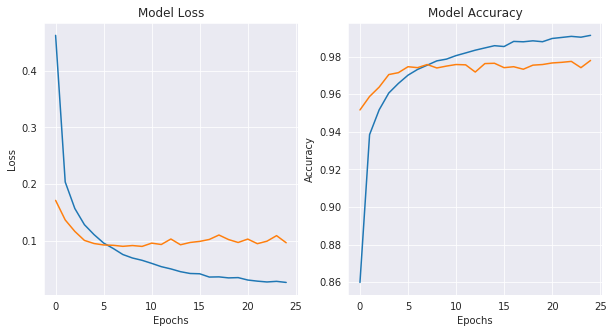

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# loss
axes[0].plot(range(NUM_EPOCHS), history.history['loss'])
axes[0].plot(range(NUM_EPOCHS), history.history['val_loss'])
axes[0].set(title='Model Loss', xlabel='Epochs', ylabel='Loss')

# accuracy
axes[1].plot(range(NUM_EPOCHS), history.history['acc'])
axes[1].plot(range(NUM_EPOCHS), history.history['val_acc'])
axes[1].set(title='Model Accuracy', xlabel='Epochs', ylabel='Accuracy');

---

## Deep Learning Using Convolutional Neural Networks

__Preprocessing__

In [17]:
NUM_CLASSES = 10

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("Before preprocessing: ")
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

# data to float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# reshape the data
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]

# format the labels data
Y_train = keras.utils.np_utils.to_categorical(y_train, NUM_CLASSES)
Y_test = keras.utils.np_utils.to_categorical(y_test, NUM_CLASSES)

print("\nAfter preprocessing: ")
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", Y_train.shape)
print("y_test.shape: ", Y_test.shape)

Before preprocessing: 
X_train.shape:  (60000, 28, 28)
X_test.shape:  (10000, 28, 28)
y_train.shape:  (60000,)
y_test.shape:  (10000,)

After preprocessing: 
X_train.shape:  (60000, 28, 28, 1)
X_test.shape:  (10000, 28, 28, 1)
y_train.shape:  (60000,)
y_test.shape:  (10000,)


### First Model

In [20]:
# ======== constants =========
NUM_EPOCHS = 25
BATCH_SIZE = 128
VERBOSE = 1
NUM_CLASSES = 10
OPTIMIZER = keras.optimizers.SGD()
VALIDATION_SPLIT = 0.1

# =========== build the model ==============
model = keras.models.Sequential()
# 1st convolutional layer
model.add(keras.layers.Conv2D(20, kernel_size=5, padding='same',
                              input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
# output layer
model.add(keras.layers.Dense(NUM_CLASSES))
model.add(keras.layers.Activation('softmax'))

# ========== compile the model ===========
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', 
              metrics=['accuracy'])

# ============ train the model ================
history = model.fit(X_train, Y_train, verbose=VERBOSE, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALIDATION_SPLIT)

# ========== evaluation ================
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Loss score: ", score[0])
print("Accuracy score: ", score[1])

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 48s 884us/step - loss: 0.8834 - acc: 0.7825 - val_loss: 0.3021 - val_acc: 0.9192
Epoch 2/25
54000/54000 [==============================] - 47s 873us/step - loss: 0.3270 - acc: 0.9064 - val_loss: 0.2299 - val_acc: 0.9353
Epoch 3/25
54000/54000 [==============================] - 47s 873us/step - loss: 0.2684 - acc: 0.9220 - val_loss: 0.1969 - val_acc: 0.9450
Epoch 4/25
54000/54000 [==============================] - 47s 869us/step - loss: 0.2302 - acc: 0.9326 - val_loss: 0.1746 - val_acc: 0.9517
Epoch 5/25
54000/54000 [==============================] - 47s 867us/step - loss: 0.2014 - acc: 0.9407 - val_loss: 0.1559 - val_acc: 0.9565
Epoch 6/25
54000/54000 [==============================] - 47s 863us/step - loss: 0.1793 - acc: 0.9479 - val_loss: 0.1395 - val_acc: 0.9607
Epoch 7/25
54000/54000 [==============================] - 47s 870us/step - loss: 0.1612 - acc: 0.9530 - val_loss: 0.1

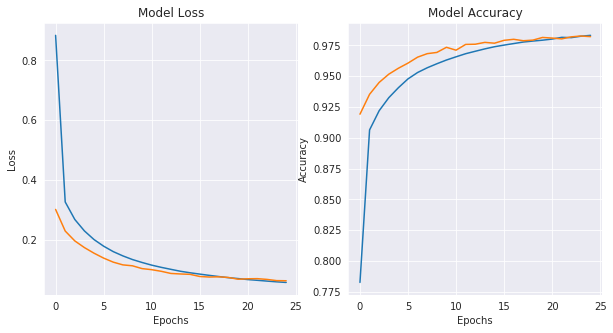

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# loss
axes[0].plot(range(NUM_EPOCHS), history.history['loss'])
axes[0].plot(range(NUM_EPOCHS), history.history['val_loss'])
axes[0].set(title='Model Loss', xlabel='Epochs', ylabel='Loss')

# accuracy
axes[1].plot(range(NUM_EPOCHS), history.history['acc'])
axes[1].plot(range(NUM_EPOCHS), history.history['val_acc'])
axes[1].set(title='Model Accuracy', xlabel='Epochs', ylabel='Accuracy');

### Second Model

In [22]:
# ======== constants =========
NUM_EPOCHS = 25
BATCH_SIZE = 128
VERBOSE = 1
NUM_CLASSES = 10
OPTIMIZER = keras.optimizers.SGD()
VALIDATION_SPLIT = 0.1

# =========== build the model ==============
model = keras.models.Sequential()
# 1st convolutional layer
model.add(keras.layers.Conv2D(20, kernel_size=5, padding='same',
                              input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# 2nd convolutional layer
model.add(keras.layers.Conv2D(50, kernel_size=5, border_mode='same' ))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
# output layer
model.add(keras.layers.Dense(NUM_CLASSES))
model.add(keras.layers.Activation('softmax'))

# ========== compile the model ===========
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', 
              metrics=['accuracy'])

# ============ train the model ================
history = model.fit(X_train, Y_train, verbose=VERBOSE, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALIDATION_SPLIT)

# ========== evaluation ================
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Loss score: ", score[0])
print("Accuracy score: ", score[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`
  app.launch_new_instance()


Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 102s 2ms/step - loss: 0.9280 - acc: 0.7489 - val_loss: 0.2820 - val_acc: 0.9190
Epoch 2/25
54000/54000 [==============================] - 101s 2ms/step - loss: 0.2909 - acc: 0.9127 - val_loss: 0.2032 - val_acc: 0.9388
Epoch 3/25
54000/54000 [==============================] - 102s 2ms/step - loss: 0.2131 - acc: 0.9354 - val_loss: 0.1452 - val_acc: 0.9588
Epoch 4/25
54000/54000 [==============================] - 101s 2ms/step - loss: 0.1663 - acc: 0.9500 - val_loss: 0.1190 - val_acc: 0.9668
Epoch 5/25
54000/54000 [==============================] - 101s 2ms/step - loss: 0.1377 - acc: 0.9588 - val_loss: 0.1108 - val_acc: 0.9697
Epoch 6/25
54000/54000 [==============================] - 100s 2ms/step - loss: 0.1154 - acc: 0.9649 - val_loss: 0.0931 - val_acc: 0.9743
Epoch 7/25
54000/54000 [==============================] - 100s 2ms/step - loss: 0.1017 - acc: 0.9695 - val_loss: 0.0879 - v

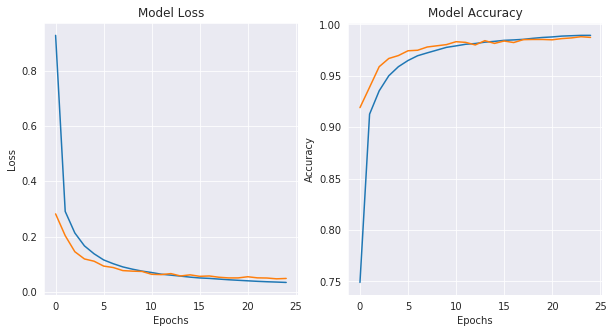

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# loss
axes[0].plot(range(NUM_EPOCHS), history.history['loss'])
axes[0].plot(range(NUM_EPOCHS), history.history['val_loss'])
axes[0].set(title='Model Loss', xlabel='Epochs', ylabel='Loss')

# accuracy
axes[1].plot(range(NUM_EPOCHS), history.history['acc'])
axes[1].plot(range(NUM_EPOCHS), history.history['val_acc'])
axes[1].set(title='Model Accuracy', xlabel='Epochs', ylabel='Accuracy');